In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
# importing deep learning libraries
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [20]:
picture_size = 48
folder_path = "Training/images/"

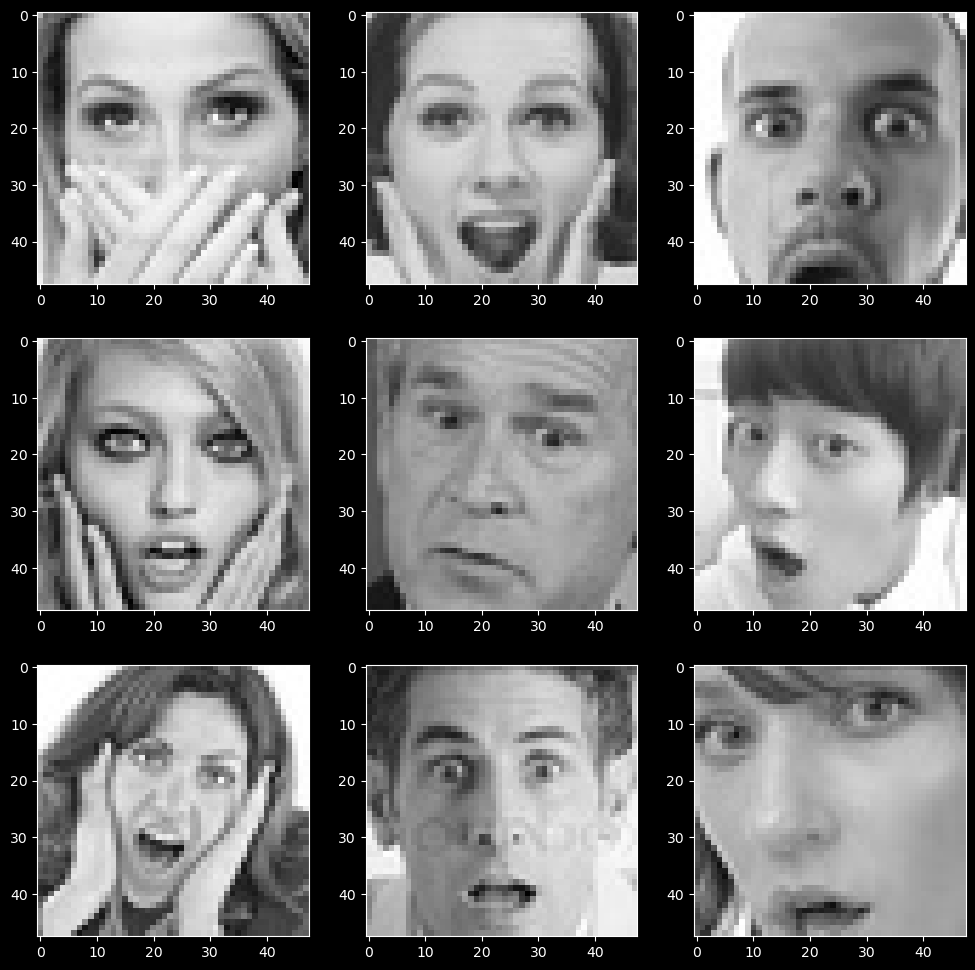

In [19]:
from keras.preprocessing.image import load_img
expression = 'surprise'
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path + "train/" + expression+"/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size,picture_size))
    plt.imshow(img)
plt.show()                              

In [17]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',  # Correct spelling
    shuffle=True)

test_set = datagen_val.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',  # Correct spelling
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [34]:
from keras.models import Sequential

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

no_cls = 7
model = Sequential()

# 1st CNN Layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN Layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#3rd CNN Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#4th CNN Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully Connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully Connected 1st Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(no_cls, activation = 'softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy' , metrics= ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_11 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_11 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 128)      

In [2]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping, checkpoint, reduce_learning_rate]
epochs = 35

In [48]:
history = model.fit_generator(generator=train_set,
                              steps_per_epoch=train_set.n // train_set.batch_size,
                              epochs=epochs,
                              validation_data=test_set,
                              validation_steps=test_set.n // test_set.batch_size,
                              callbacks=callbacks_list
                            )


C:\Users\Ananya saha\AppData\Local\Temp\ipykernel_20944\2635036525.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.7760 - accuracy: 0.3224
Epoch 1: val_accuracy improved from -inf to 0.37330, saving model to best_model.h5


C:\Users\Ananya saha\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 718s 3s/step - loss: 1.7760 - accuracy: 0.3224 - val_loss: 1.7408 - val_accuracy: 0.3733 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4257 - accuracy: 0.4532
Epoch 2: val_accuracy improved from 0.37330 to 0.44162, saving model to best_model.h5
225/225 [==============================] - 596s 3s/step - loss: 1.4257 - accuracy: 0.4532 - val_loss: 1.5762 - val_accuracy: 0.4416 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.2737 - accuracy: 0.5120
Epoch 3: val_accuracy improved from 0.44162 to 0.51122, saving model to best_model.h5
225/225 [==============================] - 587s 3s/step - loss: 1.2737 - accuracy: 0.5120 - val_loss: 1.2731 - val_accuracy: 0.5112 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.1950 - accuracy: 0.5477
Epoch 4: val_accuracy improved from 0.51122 to 0.54759, saving model to best_model.h5
225/225 [==========

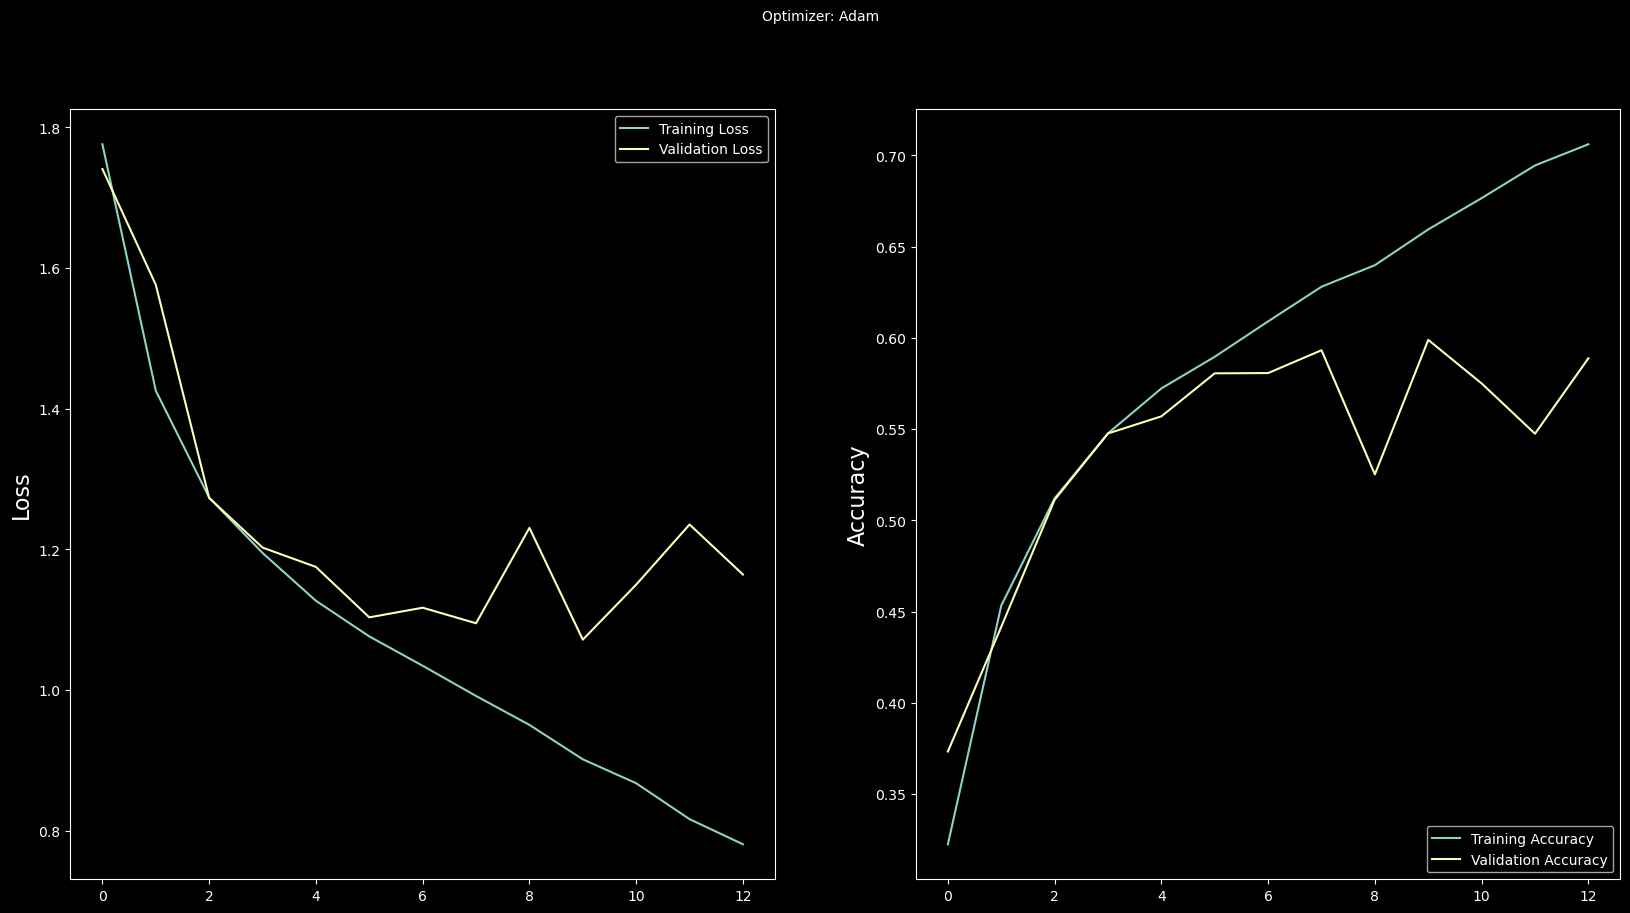

In [50]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend (loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend (loc='lower right')
plt.show()

In [1]:
from IPython.display import FileLink
file_path = 'best_model.h5'
file_link = FileLink(file_path)
file_link

C:\Users\Ananya saha\Downloads\Python\best_model.h5